In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from basic_ml.ml_preprocessing import get_features_and_target
import matplotlib.pyplot as plt

In [13]:
df = get_features_and_target("BTC/USDT", day_to_forecast=1, feature_lags=[3, 9, 16, 24])

X = df.drop(columns=f"BTC:USDT_target")
y = df[f"BTC:USDT_target"].copy()

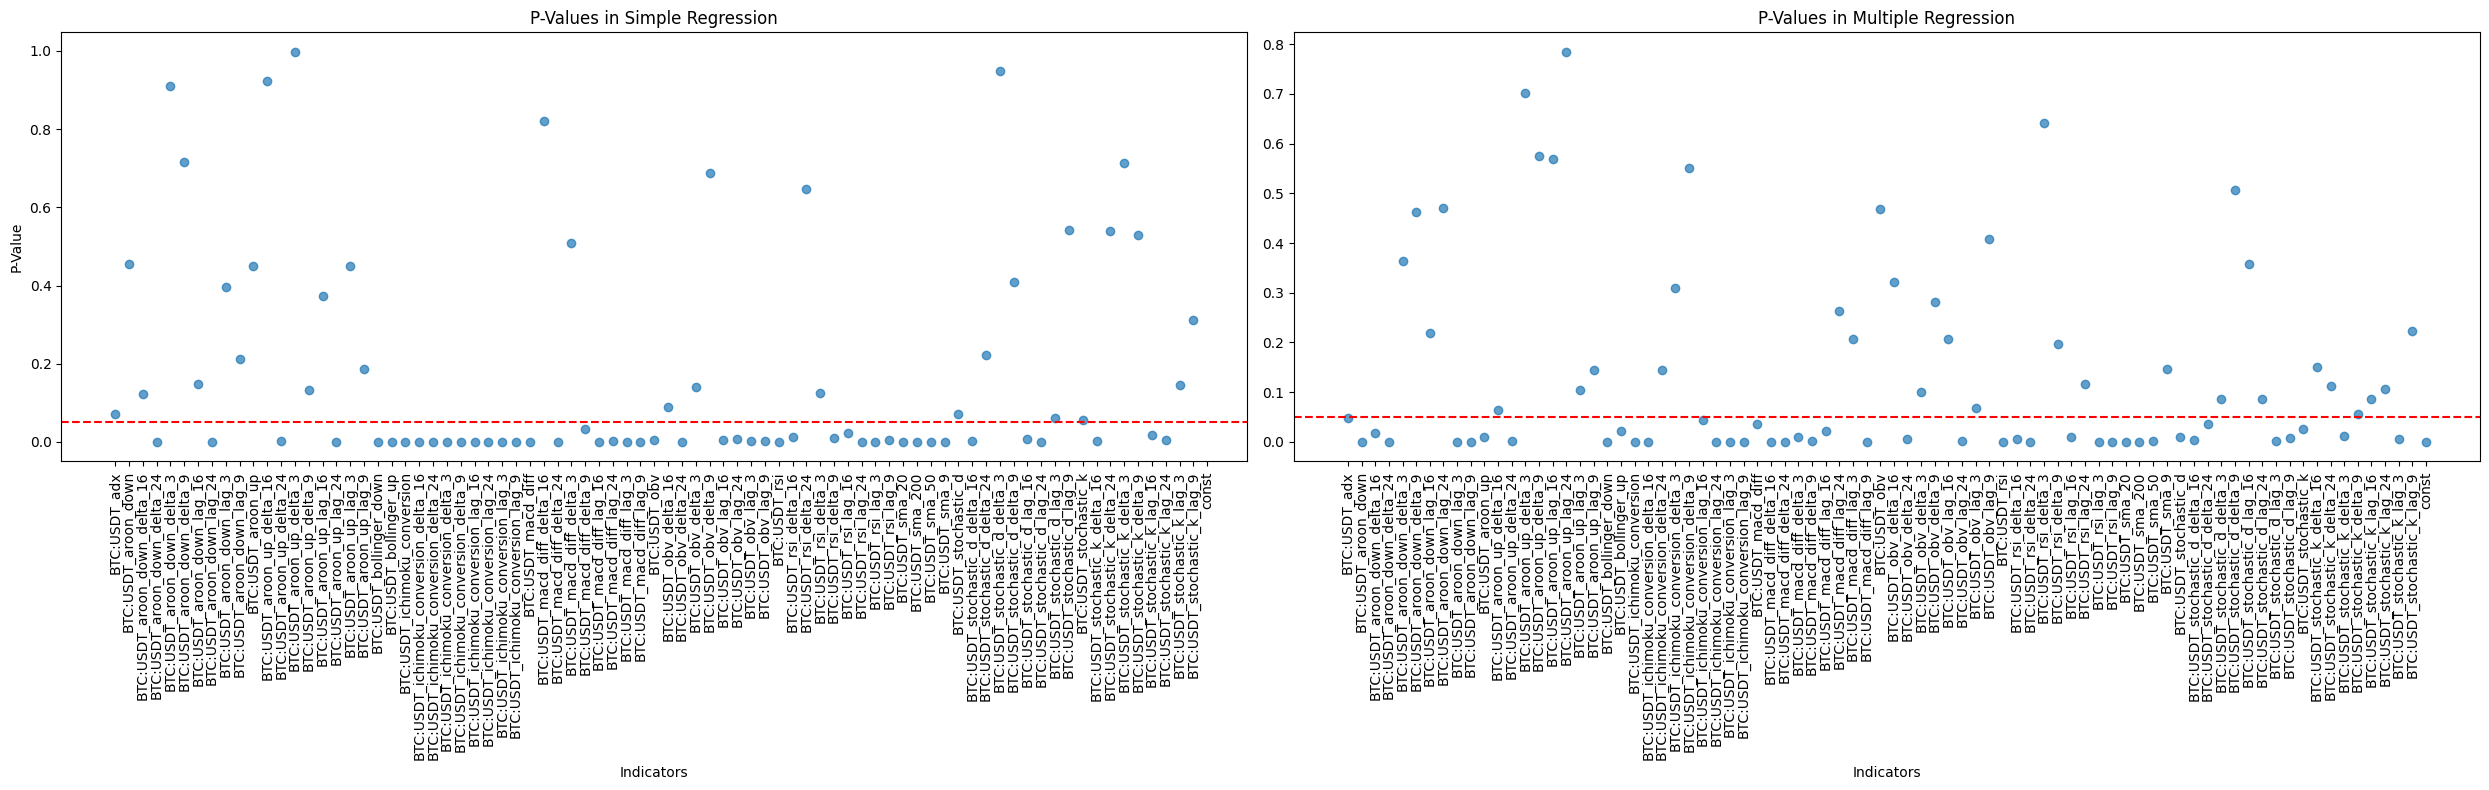

Indicators with p-values above 0.05 in both methods:                                 Simple Regression  Multiple Regression
BTC:USDT_aroon_down_delta_3              0.910646             0.364652
BTC:USDT_aroon_down_delta_9              0.715290             0.461622
BTC:USDT_aroon_down_lag_16               0.147931             0.218820
BTC:USDT_aroon_up_delta_16               0.924317             0.063418
BTC:USDT_aroon_up_delta_3                0.997651             0.702584
BTC:USDT_aroon_up_delta_9                0.134059             0.574250
BTC:USDT_aroon_up_lag_16                 0.374199             0.569882
BTC:USDT_aroon_up_lag_3                  0.449514             0.104266
BTC:USDT_aroon_up_lag_9                  0.187718             0.144701
BTC:USDT_obv_delta_16                    0.088672             0.320668
BTC:USDT_obv_delta_3                     0.140374             0.101020
BTC:USDT_obv_delta_9                     0.689058             0.282274
BTC:USDT_rsi_delta_3    

In [21]:
# Assuming X and y are already defined
# Adding a constant for the intercept in the multiple linear regression
X_with_const = sm.add_constant(X)
model_multiple = sm.OLS(y, X_with_const).fit()

# Extract p-values from the multiple regression model
p_values_multiple = model_multiple.pvalues

# Dictionary to store p-values from simple linear regressions
p_values_simple = {}

# Compute p-values using simple linear regressions
for indicator in X.columns:
    # Prepare the data
    X_indicator = X[[indicator]]  # Keep it as a DataFrame
    X_with_const = sm.add_constant(X_indicator)  # Adding a constant for intercept

    # Fit the linear regression model
    model_simple = sm.OLS(y, X_with_const).fit()

    # Get the p-value for the indicator
    p_value = model_simple.pvalues[indicator]
    p_values_simple[indicator] = p_value

# Convert to DataFrame for easier handling
df_p_values = pd.DataFrame(
    {
        "Simple Regression": pd.Series(p_values_simple),
        "Multiple Regression": pd.Series(p_values_multiple),
    }
)
# Identify indicators with p-values above 0.05 in both methods
above_05_both = df_p_values[
    (df_p_values["Simple Regression"] > 0.05)
    & (df_p_values["Multiple Regression"] > 0.05)
]


# Plotting the distribution of p-values
plt.figure(figsize=(25, 8))

# Plot for Simple Regression
plt.subplot(1, 2, 1)
plt.scatter(df_p_values.index, df_p_values["Simple Regression"], alpha=0.7)
plt.axhline(y=0.05, color="r", linestyle="--")
plt.xlabel("Indicators")
plt.ylabel("P-Value")
plt.title("P-Values in Simple Regression")
plt.xticks(rotation=90)

# Plot for Multiple Regression
plt.subplot(1, 2, 2)
plt.scatter(df_p_values.index, df_p_values["Multiple Regression"], alpha=0.7)
plt.axhline(y=0.05, color="r", linestyle="--")
plt.xlabel("Indicators")
plt.title("P-Values in Multiple Regression")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Outputting the indicators with p-values above 0.05 in both methods
print("Indicators with p-values above 0.05 in both methods:", above_05_both)